## Battle of Neighborhoods: Vancouver vs Toronto 

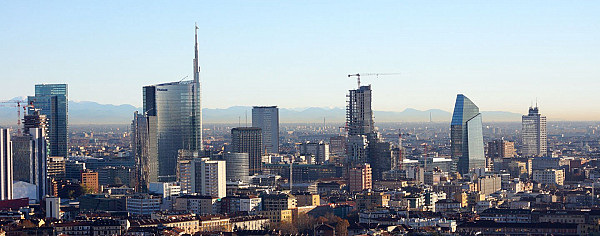

  ### 1. Introduction/Business Problem 

This project aims to compare the neighborhoods in two major cities __Vancouver__ and __Toronto.__ 
A multinational company headquatered in New York is planning for the growth of the company in Canadian provinces, and is thus in search of a place for its office. The company has two options available i.e either __Vancouver(British Columbia Province)__ or __Toronto(Ontario province)__. The company needs to determine better of the two cities for setting up the office. The comapany must consider various factors while deciding the neighborhoods. The company must choose a city with various facilities like:
<ul>
<li>It should be easy for employees to relocate.</li>
<li>The neighborhoods must have schools, colleges for Employees family.</li>
<li>Market needs should be satisified easily.</li>
<li>Local business growth should be possible.</li>
<li>Easy access to gyms/parks/refreshment activities places.</li>
<li>A neighborhood of better transport connectivity with rest part of city. </li>
<li>Easy access to banks.</li>
</ul>

###  2. Data Source 

In this project I have used data from websites of local authorities of Vancouver and wikipedia for data of Toronto.
I have used __Foursquare API__ which is a location data service provider and is used to fetch location data. I have used various libraries in completing the project such as:
<ul>
    <li> Numpy </li>
    <li> Pandas </li>
    <li> Nominatim </li>
    <li> Folium </li>
    <li> Json </li>
    <li> Matplotlib </li>
    <li> Requests </li>
    <li> Beautiful Soup </li>
    <li> Sklearn </li>
</ul>

Data sources used in the project: 

Vancouver data: https://opendata.vancouver.ca/explore/dataset/local-area-boundary/export/ <br>
Toronto data: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' ; http://cocl.us/Geospatial_data

### 3. Methodology 

The data has been stored in __Pandas__ dataframe and analysed extensively. __Geopy__ library is used for fetching latitudes and longitudes.__Matplotlib__ and __Folium__ have been used for visualisation.__Beautiful Soup__ has been used to fetch data for web scraping of data for the project. Unsupervised Machine Learning Algorithm __KMeans__ has been used to cluster various neighborhoods based on venues so that conclusions can be drown out easily. 

#### Downloading Libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

#conda install -c conda-forge lxml --yes 

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
from bs4 import BeautifulSoup as bsoup
from urllib.request import urlopen as uReq
import requests
import lxml
import pandas as pd
from pandas import DataFrame
import numpy as np

#### Download Vancouver data

In [3]:
with open(r'C:\Users\user\Desktop\MOOCS\Applied Capstone\Week4\vancouver_data.json') as json_data:
    vancouver_data = json.load(json_data)

In [4]:
vancouver_data

[{'datasetid': 'local-area-boundary',
  'recordid': 'b5f389ecdc26e66765eb7e4ddb2b26f324791f38',
  'fields': {'mapid': 'AR',
   'geom': {'type': 'Polygon',
    'coordinates': [[[-123.15259552001953, 49.25722503661694],
      [-123.16487884521483, 49.25742721557202],
      [-123.16487884521483, 49.25756835937086],
      [-123.17807006835936, 49.257766723628684],
      [-123.17810058593747, 49.25716400146071],
      [-123.17792510986327, 49.25693893432204],
      [-123.17616271972653, 49.25561141967359],
      [-123.17501068115232, 49.25408172607007],
      [-123.1719055175781, 49.25155258178297],
      [-123.16960144042967, 49.2489624023396],
      [-123.17092895507811, 49.249671936031],
      [-123.17218780517575, 49.25004577636304],
      [-123.1709518432617, 49.24845886230054],
      [-123.1705627441406, 49.248119354243904],
      [-123.17015838623044, 49.24788284301343],
      [-123.17024993896482, 49.23470306396071],
      [-123.15527343749999, 49.2345237731892],
      [-123.1550827

#### Create the dataframe

In [5]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in vancouver_data:
    
    neighborhood_name = data['fields']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods

,Neighborhood,Latitude,Longitude
0,Arbutus-Ridge,49.246805,-123.161669
1,Downtown,49.280747,-123.116567
2,Fairview,49.264540,-123.131049
3,Grandview-Woodland,49.276440,-123.066728
4,Hastings-Sunrise,49.277934,-123.040270
5,Marpole,49.210207,-123.128382
6,Riley Park,49.244766,-123.103147
7,Shaughnessy,49.245681,-123.139760
8,Strathcona,49.278220,-123.088235
9,West End,49.285011,-123.135438


In [8]:
neighborhoods.shape

(22, 3)

#### Use geopy library to get the latitude and longitude values of Vancouver, CA

In [9]:
address = 'Vancouver, CA'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Vancouver are 49.2608724, -123.1139529.


#### Use Folium to create a map of Vancouver with neighborhoods superimposed

In [10]:
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

#### Create Vancouver downtown dataframe with neighborhoods in central Vancouver only

In [11]:
vancouver_downtown = neighborhoods.drop([0,4,5,6,7,10,12,13,14,16,17,18,20,21], axis=0)
vancouver_downtown

,Neighborhood,Latitude,Longitude
1,Downtown,49.280747,-123.116567
2,Fairview,49.264540,-123.131049
3,Grandview-Woodland,49.276440,-123.066728
8,Strathcona,49.278220,-123.088235
9,West End,49.285011,-123.135438
11,Mount Pleasant,49.263065,-123.098513
15,West Point Grey,49.268401,-123.203467
19,Kitsilano,49.267540,-123.163295


#### Explore Downton Vancouver neighborhoods  with Foursquare API

In [12]:
CLIENT_ID = 'DKJ15RUHVBDRHM31UB1YZGOFJ0LJ4RMFPZ2W3WDJ1UNKBMUF' # your Foursquare ID
CLIENT_SECRET = 'W0T1KQE3FEROAVIINSNDSFLMMFMEWQKLW22SDWNX41XJRPZG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)       
# make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
        
    return(nearby_venues) 

In [14]:
vancouver_venues = getNearbyVenues(names=vancouver_downtown['Neighborhood'],
                                   latitudes=vancouver_downtown['Latitude'],
                                   longitudes=vancouver_downtown['Longitude']
                                  )

Found 302 venues in 8 neighborhoods.


In [15]:
vancouver_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,49.280747,-123.116567,L'Hermitage,49.280139,-123.117480,Hotel
1,Downtown,49.280747,-123.116567,Medina Café,49.280565,-123.116859,Breakfast Spot
2,Downtown,49.280747,-123.116567,Gotham Steakhouse & Cocktail Bar,49.282830,-123.115865,Steakhouse
3,Downtown,49.280747,-123.116567,Abercrombie & Fitch,49.282274,-123.118685,Clothing Store
4,Downtown,49.280747,-123.116567,Japadog,49.280272,-123.118260,Hot Dog Joint


#### Use onehot encoding to analyze each neighborhood

In [16]:
# use one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Belgian Restaurant,Bike Trail,Board Shop,Bookstore,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Dive Bar,Donut Shop,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Mexican Restaurant,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool Hall,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()

vancouver_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Belgian Restaurant,Bike Trail,Board Shop,Bookstore,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Dive Bar,Donut Shop,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Mexican Restaurant,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool Hall,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0.00,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.027397,0.013699,0.000000,0.000000,0.013699,0.027397,0.000000,0.013699,0.013699,0.00,0.054795,0.000000,0.000000,0.0,0.013699,0.027397,0.000000,0.027397,0.041096,0.000000,0.013699,0.000000,0.013699,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.013699,0.000000,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.00,0.000000,0.027397,0.000000,0.013699,0.00,0.000000,0.000000,0.000000,0.000000,0.013699,0.013699,0.095890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.00,0.013699,0.013699,0.013699,0.000000,0.000000,0.000000,0.013699,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.013699,0.013699,0.013699,0.013699,0.000000,0.000000,0.013699,0.000000,0.027397,0.000000,0.027397,0.000000,0.041096,0.013699,0.000000,0.00,0.013699,0.000000,0.013699,0.027397,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397,0.000000,0.013699,0.027397,0.013699,0.013699,0.00,0.000000,0.000000
1,Fairview,0.00,0.000000,0.038462,0.076923,0.000000,0.038462,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.0,0.000000,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.00,0.000000,0.000000
2,Grandview-Woodland,0.00,0.000000,0.000000,0.027778,0.027778,0.027778,0.000000,0.027778,0.00,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.00,0.027778,0.027778,0.

In [18]:
num_top_venues = 10

for hood in vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Downtown----
                           venue  freq
0                          Hotel  0.10
1                           Café  0.05
2                   Concert Hall  0.04
3             Seafood Restaurant  0.04
4                    Coffee Shop  0.03
5                 Sandwich Place  0.03
6                      Gastropub  0.03
7  Vegetarian / Vegan Restaurant  0.03
8                     Restaurant  0.03
9                 Clothing Store  0.03


----Fairview----
                    venue  freq
0             Coffee Shop  0.12
1          Breakfast Spot  0.08
2        Asian Restaurant  0.08
3     Japanese Restaurant  0.08
4                    Park  0.08
5      Salon / Barbershop  0.04
6                Pharmacy  0.04
7              Restaurant  0.04
8               Pet Store  0.04
9  Furniture / Home Store  0.04


----Grandview-Woodland----
                           venue  freq
0                    Coffee Shop  0.11
1                    Pizza Place  0.08
2                  Deli / Bodega  0.0

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [20]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        # create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Hotel,Café,Seafood Restaurant,Concert Hall,Clothing Store,Bar,Sandwich Place,Steakhouse,Restaurant,Breakfast Spot
1,Fairview,Coffee Shop,Park,Asian Restaurant,Breakfast Spot,Japanese Restaurant,Gym,Pharmacy,Camera Store,Spa,Korean Restaurant
2,Grandview-Woodland,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Deli / Bodega,Theater,Indian Restaurant,Toy / Game Store,Italian Restaurant,Pub,Cajun / Creole Restaurant
3,Kitsilano,Coffee Shop,Pizza Place,Japanese Restaurant,Wine Shop,Bakery,Bank,Grocery Store,Food Truck,Frozen Yogurt Shop,Pharmacy
4,Mount Pleasant,Coffee Shop,Diner,Breakfast Spot,Sandwich Place,Sushi Restaurant,Pizza Place,Bar,Brewery,Lounge,Record Shop
5,Strathcona,Park,Coffee Shop,Food Truck,Deli / Bodega,Pub,Restaurant,Sandwich Place,Cheese Shop,Brewery,Furniture / Home Store
6,West End,Café,Farmers Market,Coffee Shop,Gay Bar,Bookstore,Noodle House,Diner,Pub,Restaurant,Sandwich Place
7,West Point Grey,Harbor / Marina,Gym / Fitness Center,Gym,Disc Golf,Performing Arts Venue,Park,Yoga Studio,Falafel Restaurant,Dance Studio,Deli / Bodega


In [21]:
vancouver_venues[vancouver_venues["Venue Category"] == "Park"]["Venue"].count()

7

In [22]:
vancouver_venues[vancouver_venues["Venue Category"] == "Gym"]["Venue"].count()

3

In [23]:
kclusters = 3

vancouver_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 2])

In [24]:
vancouver_merged = vancouver_downtown

# add clustering labels
vancouver_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

vancouver_merged.head() 

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,49.280747,-123.116567,0,Hotel,Café,Seafood Restaurant,Concert Hall,Clothing Store,Bar,Sandwich Place,Steakhouse,Restaurant,Breakfast Spot
2,Fairview,49.264540,-123.131049,0,Coffee Shop,Park,Asian Restaurant,Breakfast Spot,Japanese Restaurant,Gym,Pharmacy,Camera Store,Spa,Korean Restaurant
3,Grandview-Woodland,49.276440,-123.066728,0,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Deli / Bodega,Theater,Indian Restaurant,Toy / Game Store,Italian Restaurant,Pub,Cajun / Creole Restaurant
8,Strathcona,49.278220,-123.088235,0,Park,Coffee Shop,Food Truck,Deli / Bodega,Pub,Restaurant,Sandwich Place,Cheese Shop,Brewery,Furniture / Home Store
9,West End,49.285011,-123.135438,0,Café,Farmers Market,Coffee Shop,Gay Bar,Bookstore,Noodle House,Diner,Pub,Restaurant,Sandwich Place


In [25]:
# create map
map_vancouver_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_vancouver_clusters)
       
map_vancouver_clusters

In [26]:
vancouver_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,49.280747,-123.116567,0,Hotel,Café,Seafood Restaurant,Concert Hall,Clothing Store,Bar,Sandwich Place,Steakhouse,Restaurant,Breakfast Spot
2,Fairview,49.264540,-123.131049,0,Coffee Shop,Park,Asian Restaurant,Breakfast Spot,Japanese Restaurant,Gym,Pharmacy,Camera Store,Spa,Korean Restaurant
3,Grandview-Woodland,49.276440,-123.066728,0,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Deli / Bodega,Theater,Indian Restaurant,Toy / Game Store,Italian Restaurant,Pub,Cajun / Creole Restaurant
8,Strathcona,49.278220,-123.088235,0,Park,Coffee Shop,Food Truck,Deli / Bodega,Pub,Restaurant,Sandwich Place,Cheese Shop,Brewery,Furniture / Home Store
9,West End,49.285011,-123.135438,0,Café,Farmers Market,Coffee Shop,Gay Bar,Bookstore,Noodle House,Diner,Pub,Restaurant,Sandwich Place


In [27]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,Hotel,Café,Seafood Restaurant,Concert Hall,Clothing Store,Bar,Sandwich Place,Steakhouse,Restaurant,Breakfast Spot
2,Fairview,Coffee Shop,Park,Asian Restaurant,Breakfast Spot,Japanese Restaurant,Gym,Pharmacy,Camera Store,Spa,Korean Restaurant
3,Grandview-Woodland,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Deli / Bodega,Theater,Indian Restaurant,Toy / Game Store,Italian Restaurant,Pub,Cajun / Creole Restaurant
8,Strathcona,Park,Coffee Shop,Food Truck,Deli / Bodega,Pub,Restaurant,Sandwich Place,Cheese Shop,Brewery,Furniture / Home Store
9,West End,Café,Farmers Market,Coffee Shop,Gay Bar,Bookstore,Noodle House,Diner,Pub,Restaurant,Sandwich Place
15,West Point Grey,Harbor / Marina,Gym / Fitness Center,Gym,Disc Golf,Performing Arts Venue,Park,Yoga Studio,Falafel Restaurant,Dance Studio,Deli / Bodega


In [28]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Mount Pleasant,Coffee Shop,Diner,Breakfast Spot,Sandwich Place,Sushi Restaurant,Pizza Place,Bar,Brewery,Lounge,Record Shop


In [29]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Kitsilano,Coffee Shop,Pizza Place,Japanese Restaurant,Wine Shop,Bakery,Bank,Grocery Store,Food Truck,Frozen Yogurt Shop,Pharmacy


## Download and explore Toronto dataset

In [30]:
#Obtain Postal Code, Borough, and Neighborhood information from Wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)

df_toronto = df[0]
df_toronto.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Transform the Data

In [31]:
df_toronto.rename(columns = {'Postal Code': 'PostalCode', 'Neighbourhood': 'Neighborhood'}, inplace = True)

#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df_toronto.drop(df_toronto[df_toronto.Borough == 'Not assigned'].index, inplace=True)

#Combine the neighborhoods 
df_toronto = df_toronto.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(lambda x: ','.join(x)).reset_index()

#Change unassigned Neighborhoods to its Borough's names
df_toronto.loc[85,'Neighborhood'] = 'Queen\'s Park'

print (df_toronto.shape)

df_toronto.head()

(103, 3)


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### Obtain longitude and latitude information and join with neighborhood data

In [32]:
#Create a dataframe of the latitude and longitudes 
df_latlong = pd.read_csv("http://cocl.us/Geospatial_data")
df_latlong.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [33]:
df_latlong.rename(columns = {"Postal Code": "PostalCode"}, inplace = True)
df_latlong.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [34]:
df_latlong.shape

(103, 3)

#### Join neighborhood dataframe with latlong dataframe

In [35]:
df_toronto.set_index("PostalCode")
df_latlong.set_index("PostalCode")
df_neighbor=pd.merge(df_toronto, df_latlong)

print (df_neighbor.shape)

df_neighbor.head()

(103, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Use geopy library to get the latitude and longitude values of Toronto

In [36]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top

In [37]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_neighbor['Latitude'], df_neighbor['Longitude'], df_neighbor['Borough'], df_neighbor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Segmenting and clustering only the neighborhoods in Central Toronto. 

In [38]:
# let's slice the original dataframe and create a new dataframe of the Central Toronto Neighborhood data.

central_toronto = df_neighbor[df_neighbor['Borough'] == 'Central Toronto'].reset_index(drop=True)
central_toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678


In [39]:
central_toronto.shape

(9, 5)

In [40]:
# get the geographical coordinates of Central Toronto

address = 'Central Toronto, CA'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Central Toronto, CA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Central Toronto, CA are 43.6534817, -79.3839347.


In [41]:
map_central_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(central_toronto['Latitude'], central_toronto['Longitude'], central_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_central_toronto)  
    
map_central_toronto  
    

#### Function to explore Central Toronto neighborhoods

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)

In [43]:
central_toronto_venues = getNearbyVenues(names=central_toronto['Neighborhood'],
                                   latitudes=central_toronto['Latitude'],
                                   longitudes=central_toronto['Longitude']
                                  )

Found 111 venues in 9 neighborhoods.


In [44]:
central_toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


In [45]:
print('There are {} distinct venues in {} categories.'.format(
    len(central_toronto_venues['Venue'].unique()),len(central_toronto_venues['Venue Category'].unique())))


There are 99 distinct venues in 64 categories.


#### Analyze each neighborhood

In [46]:
# use one hot encoding
central_toronto_onehot = pd.get_dummies(central_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
central_toronto_onehot['Neighborhood'] = central_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [central_toronto_onehot.columns[-1]] + list(central_toronto_onehot.columns[:-1])
central_toronto_onehot = central_toronto_onehot[fixed_columns]

central_toronto_onehot.head()

,Neighborhood,American Restaurant,BBQ Joint,Bagel Shop,Bank,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Lawyer,Light Rail Station,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Park,Pet Store,Pharmacy,Pizza Place,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Skating Rink,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Davisville North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
central_toronto_grouped = central_toronto_onehot.groupby('Neighborhood').mean().reset_index()
central_toronto_grouped

,Neighborhood,American Restaurant,BBQ Joint,Bagel Shop,Bank,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Lawyer,Light Rail Station,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Park,Pet Store,Pharmacy,Pizza Place,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Skating Rink,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Davisville,0.0000,0.000000,0.0000,0.0000,0.027778,0.000,0.027778,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000,0.000,0.083333,0.027778,0.000000,0.027778,0.000000,0.000,0.0000,0.0,0.027778,0.027778,0.027778,0.000000,0.055556,0.000,0.000000,0.000,0.027778,0.055556,0.027778,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.083333,0.000000,0.027778,0.000000,0.083333,0.027778,0.027778,0.000000,0.000000,0.0000,0.0000,0.055556,0.000000,0.027778,0.027778,0.027778,0.00,0.000000,0.0000,0.000000
1,Davisville North,0.0000,0.000000,0.0000,0.0000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.125,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000
2,"Forest Hill North & West, Forest Hill Road Park",0.0000,0.000000,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.250000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.0000,0.000000
3,Lawrence Park,0.0000,0.000000,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.333333,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000
4,"Moore Park, Summerhill East",0.0000,0.000000,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.25,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000
5,"North Toronto West, Lawrence Park",0.0000,0.000000,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.055556,0.055556,0.111111,0.111111,0.000,0.000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.055556,0.000000,0.00,0.00,0.0000,0.000000,0.055556,0.0

#### Explore the top 10 venues of each neighborhood

In [48]:
num_top_venues = 10

for hood in central_toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = central_toronto_grouped[central_toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Davisville----
                venue  freq
0         Pizza Place  0.08
1      Sandwich Place  0.08
2        Dessert Shop  0.08
3                Café  0.06
4    Sushi Restaurant  0.06
5         Coffee Shop  0.06
6  Italian Restaurant  0.06
7                 Gym  0.06
8     Thai Restaurant  0.03
9                Park  0.03


----Davisville North----
                       venue  freq
0                       Park  0.12
1                      Hotel  0.12
2           Department Store  0.12
3               Dance Studio  0.12
4             Sandwich Place  0.12
5       Gym / Fitness Center  0.12
6          Food & Drink Shop  0.12
7             Breakfast Spot  0.12
8         Miscellaneous Shop  0.00
9  Middle Eastern Restaurant  0.00


----Forest Hill North & West, Forest Hill Road Park----
                 venue  freq
0        Jewelry Store  0.25
1                Trail  0.25
2                 Park  0.25
3     Sushi Restaurant  0.25
4  American Restaurant  0.00
5   Miscellaneous Shop  0.00


#### Create pandas dataframe for the top 10 venues 

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
central_toronto_venues_sorted = pd.DataFrame(columns=columns)

central_toronto_venues_sorted['Neighborhood'] = central_toronto_grouped['Neighborhood']

for ind in np.arange(central_toronto_grouped.shape[0]):
    central_toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(central_toronto_grouped.iloc[ind, :], num_top_venues)

central_toronto_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Davisville,Dessert Shop,Pizza Place,Sandwich Place,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Café,Indian Restaurant,Restaurant
1,Davisville North,Department Store,Gym / Fitness Center,Hotel,Sandwich Place,Dance Studio,Breakfast Spot,Park,Food & Drink Shop,Fried Chicken Joint,Fast Food Restaurant
2,"Forest Hill North & West, Forest Hill Road Park",Trail,Park,Jewelry Store,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop
3,Lawrence Park,Park,Swim School,Bus Line,Yoga Studio,Garden,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Gas Station
4,"Moore Park, Summerhill East",Restaurant,Park,Tennis Court,Lawyer,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Gas Station
5,"North Toronto West, Lawrence Park",Coffee Shop,Clothing Store,Yoga Studio,Miscellaneous Shop,Pet Store,Diner,Mexican Restaurant,Restaurant,Salon / Barbershop,Chinese Restaurant
6,Roselawn,Garden,Yoga Studio,Vietnamese Restaurant,History Museum,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant,Gourmet Shop,Gas Station
7,"Summerhill West, Rathnelly, South Hill, Forest...",Pub,Coffee Shop,Sports Bar,Vietnamese Restaurant,Fried Chicken Joint,Light Rail Station,Liquor Store,Pizza Place,Restaurant,American Restaurant
8,"The Annex, North Midtown, Yorkville",Sandwich Place,Café,Coffee Shop,Indian Restaurant,History Museum,Liquor Store,Donut Shop,Middle Eastern Restaurant,Park,Pharmacy


In [51]:
central_toronto_venues[central_toronto_venues["Venue Category"] == "Park"]["Venue"].count()

7

In [52]:
central_toronto_venues[central_toronto_venues["Venue Category"] == "Gym"]["Venue"].count()

2

#### Clustering the Central Toronto neighborhoods uding k-means

In [53]:
kclusters = 3

central_toronto_grouped_clustering = central_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(central_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 2, 1, 1])

#### Create a new dataframe that includes the clusters as well as the top 10 venues for each neighborhood

In [54]:

central_toronto_merged = central_toronto

# add clustering labels
central_toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
central_toronto_merged = central_toronto_merged.join(central_toronto_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

central_toronto_merged.head() 

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Park,Swim School,Bus Line,Yoga Studio,Garden,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Gas Station
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197,1,Department Store,Gym / Fitness Center,Hotel,Sandwich Place,Dance Studio,Breakfast Spot,Park,Food & Drink Shop,Fried Chicken Joint,Fast Food Restaurant
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,1,Coffee Shop,Clothing Store,Yoga Studio,Miscellaneous Shop,Pet Store,Diner,Mexican Restaurant,Restaurant,Salon / Barbershop,Chinese Restaurant
3,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Pizza Place,Sandwich Place,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Café,Indian Restaurant,Restaurant
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Restaurant,Park,Tennis Court,Lawyer,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Gas Station


In [55]:
map_central_toronto_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(central_toronto_merged['Latitude'], central_toronto_merged['Longitude'], central_toronto_merged['Neighborhood'], central_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_central_toronto_clusters)
       
map_central_toronto_clusters

#### Explore the clusters

In [56]:
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 0, central_toronto_merged.columns[[0] + list(range(2, central_toronto_merged.shape[1]))]]

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,M4S,Davisville,43.704324,-79.38879,0,Dessert Shop,Pizza Place,Sandwich Place,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Café,Indian Restaurant,Restaurant


In [57]:
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 1, central_toronto_merged.columns[[0] + list(range(2, central_toronto_merged.shape[1]))]]

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,Lawrence Park,43.728020,-79.388790,1,Park,Swim School,Bus Line,Yoga Studio,Garden,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Fried Chicken Joint,Gas Station
1,M4P,Davisville North,43.712751,-79.390197,1,Department Store,Gym / Fitness Center,Hotel,Sandwich Place,Dance Studio,Breakfast Spot,Park,Food & Drink Shop,Fried Chicken Joint,Fast Food Restaurant
2,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,1,Coffee Shop,Clothing Store,Yoga Studio,Miscellaneous Shop,Pet Store,Diner,Mexican Restaurant,Restaurant,Salon / Barbershop,Chinese Restaurant
4,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,1,Restaurant,Park,Tennis Court,Lawyer,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Gas Station
5,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,1,Pub,Coffee Shop,Sports Bar,Vietnamese Restaurant,Fried Chicken Joint,Light Rail Station,Liquor Store,Pizza Place,Restaurant,American Restaurant
7,M5P,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,1,Trail,Park,Jewelry Store,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop
8,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1,Sandwich Place,Café,Coffee Shop,Indian Restaurant,History Museum,Liquor Store,Donut Shop,Middle Eastern Restaurant,Park,Pharmacy


In [58]:
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 2, central_toronto_merged.columns[[0] + list(range(2, central_toronto_merged.shape[1]))]]

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M5N,Roselawn,43.711695,-79.416936,2,Garden,Yoga Studio,Vietnamese Restaurant,History Museum,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant,Gourmet Shop,Gas Station


### 4. Results

### 4.1. Downtown Vancouver Neighborhoods

We have used __KMeans__ clustering algorithm to cluster neighborhoods in __Vancouver.__ Cluster labeled with value 0 has 6 neighborhoods where the most common venues are coffee-shops, various restaurants, parks and toy stores and many other places. Cluster labeled with value 1 has only 1 neighborhood which has many restaurants but no fitness center i.e gym and even a pharmacy. Cluster labeled with value 2 also has only 1 neighborhood with many coffee-shops and restaurants but no fitness centers at all. 

Altogether, there are total of __302__ venues in __8 Downtown Vancouver neighborhoods__. All the 3 clusters of neighborhoods have plenty of eateries but most of the services are present in cluster 0. Cluster 2 and 3 have no parks, gyms, toy stores. Cluster 2 and Cluster 3 have only Japanese and sushi restaurants as places to eat  whereas cluster 0 has many other alternatives.

### 4.2. Central Toronto Neighborhoods

We have used __KMeans__ clustering algorithm to cluster neighborhoods in __Toronto.__ Cluster labeled with value 0 has only 1  neighborhood where the most common venues are coffee-shops, various restaurants. Cluster labeled with value 1 has 7  neighborhoods with parks, stores , various restaurants and sports centers. Cluster labeled with value 2 also has only 1 neighborhood with many restaurants, gym and less alternatives to eat at restaurants. 

Altogether, there are total of __111__ venues in __9 Central Toronto neighborhoods.__ All the 3 clusters of neighborhoods have pleanty of eateries but most of the services are present in cluster 1. Cluster 0 and 2 have no parks, gyms, toy stores, pharmacy and pet stores. Cluster 0 and Cluster 2 have many less facilities as compared to cluster 1.

### 5. Discussion

The segmentation and clustering of the cities of __Vancouver__ and __Toronto__ provided very similar results. In the central parts of the cities, __8__ neighborhoods were compared and analyzed in Vancouver and __9__ were analysed and comapared in Toronto. According to the data provided by __Foursquare__, there are __302__ venues in __Vancouver__ and __111__ in __Toronto__, the venue categories being very similar, with prevailing coffee shops, different kinds of restaurants and places to eat, entertainment, parks etc. The clustering of the two cities also showed similar results, where most of the neighborhoods were clustered in one cluster (__6__ in __Vancouver__ and __7__ in Toronto) with the remaining two clusters having __1__ each. 

### 6. Conclusion and Recommendations

The data analysis has produced very similar results for the two cities in terms of variety of venues and homogenity. However, since there are considerably more venues in Downtown Vancouver (302) as compared to Central Toronto (111), our recommendation to the multi national company (MNC) will be to locate the new office in one of the neighborhoods shown in cluster 0 in Downtown Vancouver, since they are most closely fitting the requirements of having an easy access to places to eat, to have good fitness, refreshment and recreational activities as well as stores related to basic necessities.